In [1]:
# f(x0, x1, x2) = x0x1 xor x1 xor x0x2
# balanced function
for x0 in [0, 1]:
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            print(f"f({x0}, {x1}, {x2}) = {x0*x1 ^ x1 ^ x0*x2}")

f(0, 0, 0) = 0
f(0, 0, 1) = 0
f(0, 1, 0) = 1
f(0, 1, 1) = 1
f(1, 0, 0) = 0
f(1, 0, 1) = 1
f(1, 1, 0) = 0
f(1, 1, 1) = 1


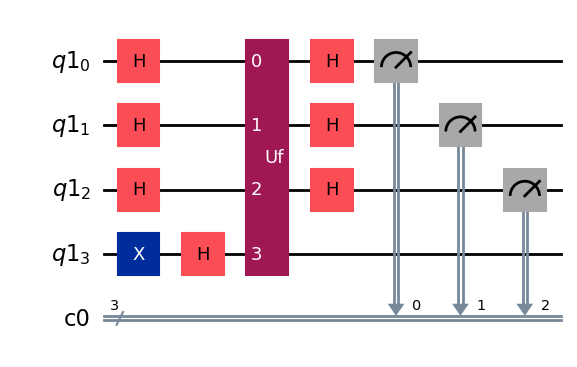

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

# if the result of measuring the first n qubits gives 0000...0 then the function f is constant.
# else the fucntion f is balanced

n = 3
qr = QuantumRegister(n + 1)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr, cr)

qc.h(qr[:n])
qc.x(qr[n])
qc.h(qr[n])


def u_f(n=3):

    # f(x0, x1, x2) = x0x1 xor x1 xor x0x2
    # balanced function
    uf_qc = QuantumCircuit(n + 1)
    uf_qc.ccx(0, 1, n)
    uf_qc.cx(1, n)
    uf_qc.ccx(0, 2, n)

    uf_gate = uf_qc.to_gate()
    uf_gate.name = "Uf"

    return uf_gate


qc.append(u_f(n), qr)

qc.h(qr[:n])

qc.measure(qr[:n], [cr[i] for i in range(n)])

simulator = AerSimulator()
isa_circuit = transpile(qc, simulator)

qc.draw(output="mpl")

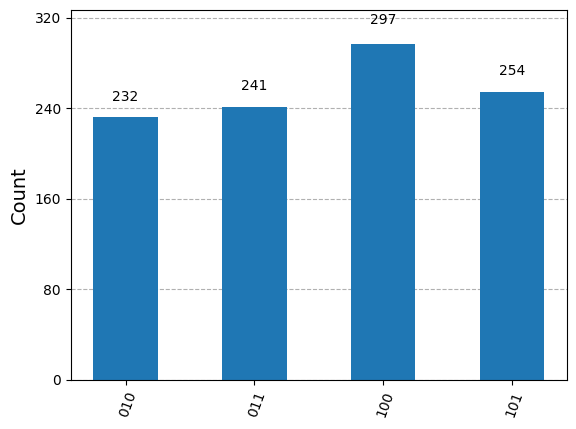

In [3]:
from qiskit.visualization import plot_histogram


result = simulator.run(isa_circuit).result()
counts = result.get_counts(isa_circuit)

plot_histogram(counts)